In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from warnings import simplefilter
Labels=["Normal","Fraud"]

In [40]:
df=pd.read_csv("C:/Users/Roshni/Desktop/Macquarie university/Pythonpractice/creditcard.csv",na_values="?")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [42]:
df.isnull().sum()
x=df.fillna(method='bfill',inplace=True)
print(x)
df.dropna().isnull().sum()

None


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0D5F6B208>,
      dtype=object)

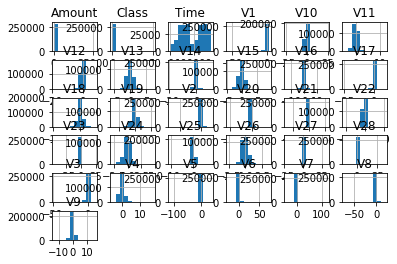

In [43]:
df.hist()

AttributeError: 'range' object has no attribute 'Labels'

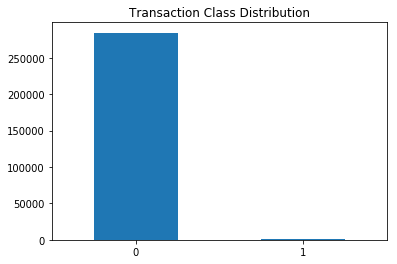

In [44]:
count_classes = pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2).Labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [45]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [46]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [47]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [48]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

AttributeError: 'Figure' object has no attribute 'subtitle'

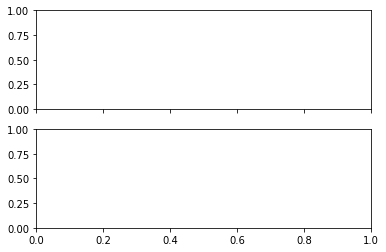

In [49]:
f, (ax1,ax2) = plt.subplots(2,1,sharex=True)
f.subtitle("Amount per transaction by class")
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0,2000)
plt.yscale('log')
plt.show()

In [50]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
from sklearn.utils import resample

In [52]:
# Separate majority and minority classes
normal = df[df.Class==0]
fraud = df[df.Class==1]
 
# Downsample majority class
df_normal_downsampled = resample(normal, 
                                 replace=False,    # sample without replacement
                                 n_samples=492,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_normal_downsampled, fraud])
 
# Display new class counts
df_downsampled.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

# Imbalanced class problem solved

In [53]:
df_downsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
143480,85380.0,-1.337885,0.261692,2.646536,-1.973014,-0.933318,-1.123839,0.277759,-0.039386,1.111226,...,0.332076,1.124621,-0.312253,0.968527,0.570910,-0.704900,0.253527,0.169347,72.64,0
163666,116137.0,2.081591,-0.774080,-0.674991,-0.322871,-0.890005,-0.801469,-0.532596,-0.280944,-0.354142,...,-0.329597,-0.310603,0.268725,0.020092,-0.359343,0.555034,-0.025385,-0.044868,35.29,0
137005,81976.0,-0.332971,1.188389,1.308248,0.052384,0.087272,-0.966515,0.750302,-0.108085,-0.488491,...,-0.258700,-0.638700,-0.029226,0.346024,-0.140051,0.070181,0.250678,0.099306,0.99,0
155649,106007.0,-0.830622,1.222904,1.859594,-0.318554,0.272904,0.080357,0.385614,-0.167806,1.502836,...,-0.242243,-0.528849,-0.360037,-0.740677,0.367026,-0.700618,-0.323105,0.064605,2.12,0
219246,141650.0,1.964854,0.306862,-2.347355,1.144732,1.453977,-0.144400,0.871268,-0.209065,-0.308091,...,0.392735,1.461507,-0.126488,-0.910153,0.646694,-0.101542,0.000524,-0.089904,1.00,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0D516C940>,
      dtype=object)

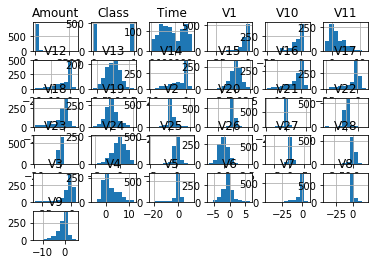

In [54]:
df_downsampled.hist()

In [71]:
from sklearn.metrics import classification_report

In [74]:
y = df_downsampled.Class
X = df_downsampled.drop('Class', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )
target_names = ['Class 0','Class 1']
print(classification_report(y, pred_y_2 , target_names=target_names))

[0 1]
0.9359756097560976
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       492
     Class 1       0.98      0.89      0.93       492

   micro avg       0.94      0.94      0.94       984
   macro avg       0.94      0.94      0.94       984
weighted avg       0.94      0.94      0.94       984



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier


In [75]:
# Separate input features (X) and target variable (y)
y = df_downsampled.Class
X = df_downsampled.drop('Class', axis=1)
 
# Train model
clf_4 = RandomForestClassifier(random_state=123456)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
target_names = ['Class 0','Class 1']
print(classification_report(y, pred_y_4 , target_names=target_names))
# 0.9744

[0 1]
0.9979674796747967
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       492
     Class 1       1.00      1.00      1.00       492

   micro avg       1.00      1.00      1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [65]:
from sklearn.metrics import roc_auc_score
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print(roc_auc_score(y, prob_y_4) )

0.9999793443056382


# Implementing Min Max scalar

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
mmscaler = MinMaxScaler()

X= mmscaler.fit_transform(X)

# Logistic regression after min-max scaling

In [76]:
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )
target_names = ['Class 0','Class 1']
print(classification_report(y, pred_y_2 , target_names=target_names))

[0 1]
0.9359756097560976
              precision    recall  f1-score   support

     Class 0       0.90      0.98      0.94       492
     Class 1       0.98      0.89      0.93       492

   micro avg       0.94      0.94      0.94       984
   macro avg       0.94      0.94      0.94       984
weighted avg       0.94      0.94      0.94       984



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest after min-max scaling

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Train model
clf_4 = RandomForestClassifier(random_state=123456)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print(accuracy_score(y, pred_y_4)) 
target_names = ['Class 0','Class 1']
print(classification_report(y, pred_y_4 , target_names=target_names))
      

[0 1]
0.9979674796747967
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       492
     Class 1       1.00      1.00      1.00       492

   micro avg       1.00      1.00      1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
